In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
scheme = {'blue':'#2f788e', 'red':'#d15b4f', 'green':'#45b563', 'grey':'#8a8888'}

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [ ]:
def getFullSequence(S_var, varpos, lib_design_sequence):
    fullseq = ''
    S_var = list(S_var)[::-1]
    for i in range(0, len(lib_design_sequence)):
        if i in varpos:
            fullseq += S_var.pop()
        else:
            fullseq += lib_design_sequence[i]
    return fullseq

In [ ]:
aurora_secstruct_positions_0 = [3,5,10,11,13,14,15,16,21,22,25,26,27,28,29,33,36,39,41,42,43,44,45,46]
aurora_control_positions_0 = [1,3,8,10,11,13,18,19,20,22,26,27,28,29,30,32,33,35,36,37,38,40,43,46]

lib_design_control = [
    'GGAMGGGAKGABTMTGTCCKKTDCCTKKWMRGYVTRYRKAGTGKTGY',
    'GCAMGGGAKGGBTMTGTCCKKTDCCTKKWMRGYVTRYRKAGTGKTGY',
    'GGAMGGGAKGABTMTGTCAKKTDCCTKKWMRGYVTRYRKATTGKTGY',
    'GGAMGGGAKGABTMTGTCCKKTDCCTKYWMRGYVTRYRKAGTGSTGY',
    'GCAMGGGAKGGBTMTGTCAKKTDCCTKKWMRGYVTRYRKATTGKTGY',
    'GCAMGGGAKGGBTMTGTCCKKTDCCTKYWMRGYVTRYRKAGTGSTGY',
    'GGAMGGGAKGABTMTGTCAKKTDCCTKYWMRGYVTRYRKATTGSTGY',
    'GCAMGGGAKGGBTMTGTCAKKTDCCTKYWMRGYVTRYRKATTGSTGY'
]

lib_design_secstruct = [
    'GGAGGRGATGRATRYRYCCGGKHCCRKWWYGGCDTGHGGRGYRYATY',
    'GGAAGRGATGRATRYRYCCGGKHCCRKWWYGGCDTGHGGRGYRYTTY',
    'GGAGGRGATGRCTRYRYCCGGKHCCRKWWYGGCDTGHGGRGYRYAGY',
    'GGAGGRGATGRATRYRYCCGGKHCCYKWWRGGCDTGHGGRGYRYATY',
    'GGAAGRGATGRCTRYRYCCGGKHCCRKWWYGGCDTGHGGRGYRYTGY',
    'GGAAGRGATGRATRYRYCCGGKHCCYKWWRGGCDTGHGGRGYRYTTY',
    'GGAGGRGATGRCTRYRYCCGGKHCCYKWWRGGCDTGHGGRGYRYAGY',
    'GGAAGRGATGRCTRYRYCCGGKHCCYKWWRGGCDTGHGGRGYRYTGY'
]

aurora2 = 'GGAAGGGATGACTATGTCCGGTTCCTGTAAGGCATGTGGAGTGTTGT'

---


In [ ]:
def prepDataset(f, name, lib_design, secstruct_positions):
    df = pd.read_csv(f, usecols=['varseq', 'cpm'])
    df = df.rename(columns={'cpm':'cpm_'+name})
    df['fullseq'] = [getFullSequence(s, secstruct_positions, lib_design[0]) for s in df['varseq']]
    return df

In [ ]:
# Load both datasets (the strct and ctrl) and while doing so, reconstruct the full sequence
df_strc = prepDataset('/home/jardic/Documents/projects/jk/aurora_secstruct_small/datasets/datasets_prepped/strc_km.csv', 'strc', lib_design_secstruct, aurora_secstruct_positions_0)
df_ctrl = prepDataset('/home/jardic/Documents/projects/jk/aurora_secstruct_small/datasets/datasets_prepped/ctrl_km.csv', 'ctrl', lib_design_control, aurora_control_positions_0)

In [ ]:
# Merge both of the sese datasets on the full seuqnece column
df_merged = df_strc[['cpm_strc', 'fullseq']].merge(df_ctrl[['cpm_ctrl', 'fullseq']], on='fullseq', how='outer')

In [ ]:
# Load the list of sequences which are encoded by both libraries
encoded_overlap_seqs = []
with open('../ref1_minor_comment_lib_overlaps/library_overlap_seqs.txt', mode='r') as f:
    for line in f:
        line = line.strip()
        encoded_overlap_seqs.append(line)

In [ ]:
# Subset df_merged to contain only those sequences encoded by both libraries. 
# Even though they are encoded by both, they might appear in just one or the other.
df_merged_sub = df_merged[df_merged['fullseq'].isin(encoded_overlap_seqs)]

In [ ]:
# Save this dataframe for re-use
df_merged_sub.to_csv('encoded_overlap_subset_of_df_merged.csv')

---
### Checkpoint

In [48]:
# Load the same dataframe (checkpoint)
df = pd.read_csv('encoded_overlap_subset_of_df_merged.csv', index_col=0)

In [49]:
strc_min = df['cpm_strc'].min()
strc_max = df['cpm_strc'].max()
ctrl_min = df['cpm_ctrl'].min()
ctrl_max = df['cpm_ctrl'].max()

min_all = min([strc_min, ctrl_min])
max_all = max([strc_max, ctrl_max])

print(f'Min all: {min_all}')
print(f'Max all: {max_all}')

Min all: 0.0424913150938796
Max all: 949.6049059219116


In [50]:
df_both = df[~df['cpm_ctrl'].isna() & ~df['cpm_strc'].isna()]
df_strc_only = df[df['cpm_ctrl'].isna()]
df_ctrl_only = df[df['cpm_strc'].isna()]

In [51]:
df_both = df_both.fillna(0.01)
df_strc_only = df_strc_only.fillna(0.02)
df_ctrl_only = df_ctrl_only.fillna(0.02)

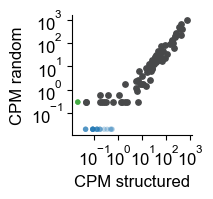

In [53]:
axis_width, axis_height = 1.2, 1.2
left_margin, bottom_margin = 0.5, 0.5
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([left_margin / fig_width, bottom_margin / fig_height, axis_width / fig_width, axis_height / fig_height])

# Plot
ax.scatter(df_both['cpm_strc'], df_both['cpm_ctrl'], color='#48494a', s=15, marker='o', alpha=1, edgecolor=None)
#ax.scatter(df_strc_only['cpm_strc'], df_strc_only['cpm_ctrl'], color='tab:blue', s=15, marker='o', facecolor='none', edgecolors='tab:blue')
#ax.scatter(df_ctrl_only['cpm_strc'], df_ctrl_only['cpm_ctrl'], color='tab:green', s=15, marker='o', facecolor='none', edgecolors='tab:green')
ax.scatter(df_strc_only['cpm_strc'], df_strc_only['cpm_ctrl'], color='tab:blue', s=15, marker='o', edgecolors='none', alpha=0.3)
ax.scatter(df_ctrl_only['cpm_strc'], df_ctrl_only['cpm_ctrl'], color='tab:green', s=15, marker='o', edgecolors='none', alpha=0.3)


plt.yscale('log')
plt.xscale('log')

plt.xticks([0.1, 1, 10, 100, 1000])
plt.yticks([0.1, 1, 10, 100, 1000])

#ax.set_xlim(0.00001, 1500)
#ax.set_ylim(0.00001, 1500)

plt.xlabel('CPM structured')
plt.ylabel('CPM random')

sns.despine()
plt.savefig('cpm_scatterplot_strc_vs_ctrl.svg')

In [39]:
print(len(df_strc_only))
print(len(df_ctrl_only))

25
6
